#LeetCode question 14: Longest Common Prefix (using trie structure)
problem url: https://leetcode.com/problems/longest-common-prefix/description/

Creation date: Sunday, July 7, 2024

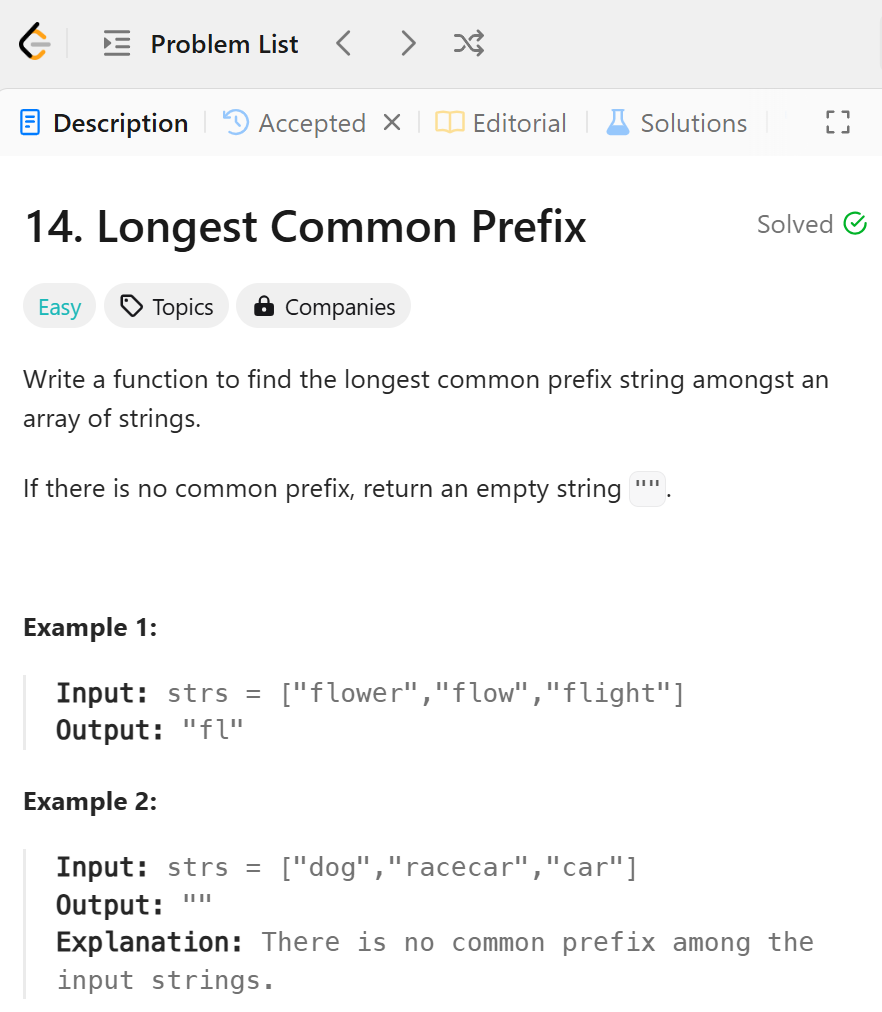

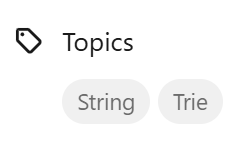

#**14. Longest Common Prefix**

Task: write a function to find the longest common prefix string amongst an array of strings.

If there is no common prefix, return an empty string "".


**Example 1**

- **Input:** strs = ["flower", "flow", "flight"]

- **Output:** "fl"

**Example 2**

- **Input:** strs = ["dog", "racecar", "car"]

- **Output:** ""

- **Explanation:** There is no common prefix among the input strings.


**Topics:** string, trie

# LeetCode-submitted codes

In [2]:
class Solution(object):

    def longestCommonPrefix(self, strs):
        """
        :type strs: List[str]
        :rtype: str
        """
        # Define the nodeTree class within the Solution class
        class nodeTree(object):

            # Initialize the instance with an optional value and an empty list of children
            def __init__(self, value=None):
                self.value = value
                self.children = []

            # Setter for the node value
            def setValue(self, value):
                self.value = value

            # Getter for the node value
            def getValue(self):
                return self.value

            # Method to add a child to the node
            def setChild(self, value):
                # Check for duplicate value in children
                for child in self.children:
                    if child.getValue() == value:
                        return child  # Return the existing child if duplicate found

                # If no duplicate is found, create a new child node
                child_node = nodeTree(value)
                self.children.append(child_node)
                return child_node  # Return the newly created child

            # Getter for the list of children
            def getChildren(self):
                return self.children

            # Display values of all children
            def displayChildValue(self):
                return [child.getValue() for child in self.children]

            # Compute the number of children
            def computeChildrenNumber(self):
                return len(self.children)

            # Method to compute the common characters
            def commonChar(self, minLengthString):
                common = []  # List to store common characters
                current_node = self  # Start with the current node

                count = 1  # Counter to limit the depth of traversal

                # Traverse while there is exactly one child and within the minimum string length
                while current_node.computeChildrenNumber() is not None and current_node.computeChildrenNumber() == 1 and count <= minLengthString:
                    if current_node.getValue() is not None:
                        common.append(current_node.getValue())  # Append the value of the current node

                    current_node = current_node.getChildren()[0]  # Move to the next child node

                    count += 1  # Increment the counter

                # Append the last value if it is not None
                if current_node.getValue() is not None:
                    common.append(current_node.getValue())

                return ''.join(common)  # Convert list of characters to a single string

        # Main code starts here

        # Edge case: If the input list is empty or contains an empty string
        if not strs or "" in strs:
            return ""

        # Non-edge case: Find the minimum length of strings in the list
        minLengthString = min([len(string) for string in strs])

        # Initialize the root of the tree
        root = nodeTree()

        # Build the tree with the input strings
        for string in strs:
            current_node = root
            for char in string:
                current_node = current_node.setChild(char)

        # Get the common characters from the root
        result = root.commonChar(minLengthString)

        return result  # Return the longest common prefix

In [4]:
# Example usage
sol = Solution()
print(sol.longestCommonPrefix(["flower","flow","flight"]))  # Output should be "fl"
print(sol.longestCommonPrefix(["dog","racecar","car"]))    # Output should be ""
print(sol.longestCommonPrefix([""]))                      # Output should be ""
print(sol.longestCommonPrefix([]))                        # Output should be ""
print(sol.longestCommonPrefix(["a"]))                     # Output should be "a"
print(sol.longestCommonPrefix(["ab", "a"]))               # Output should be "a"

fl



a
a


#Submission page

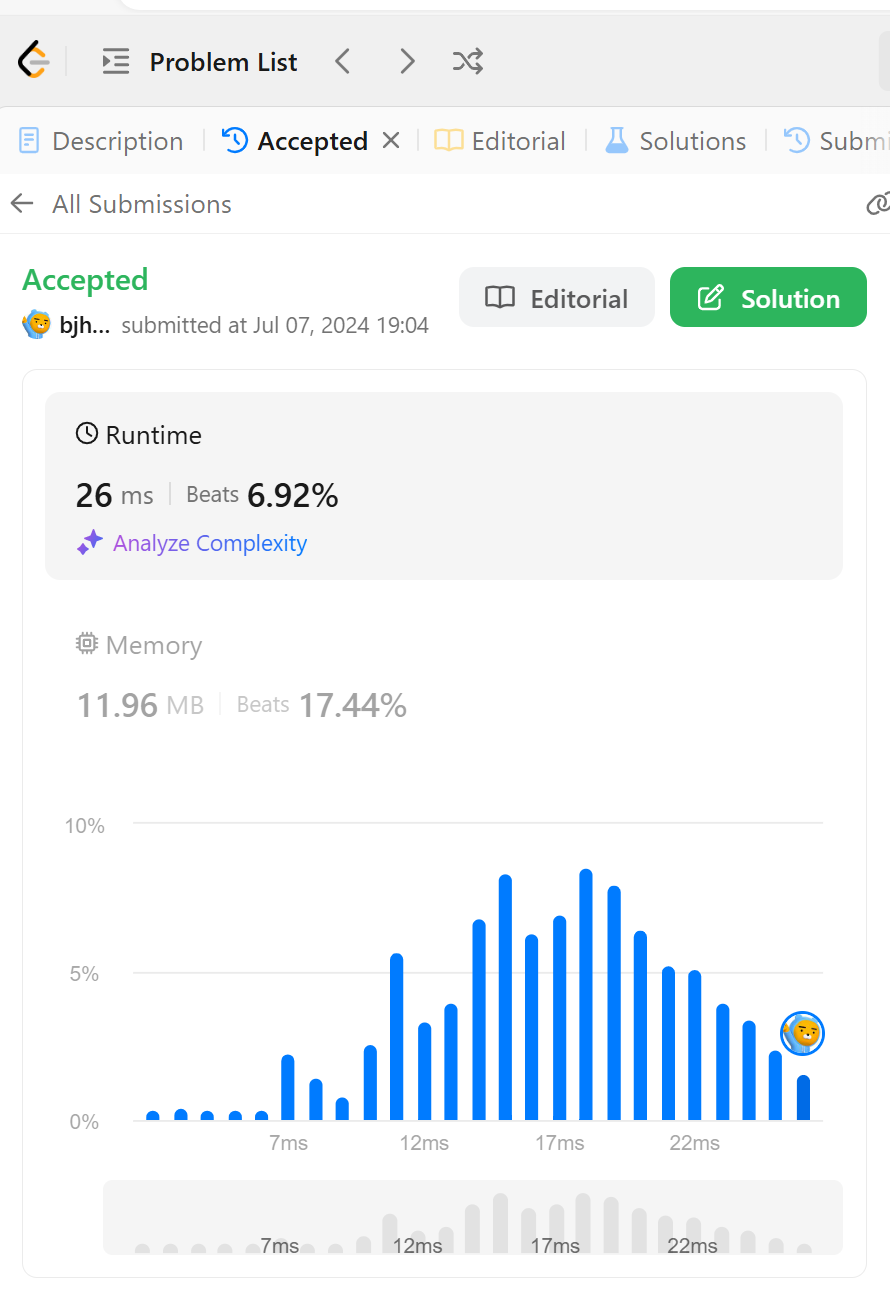

#Analysis: time complexity



#**1. Building the Tree**

- **Initialization:** Creating the root node is an $O(1)$ operation.

- **Inserting Strings into the Tree:**

	- For each string in 'strs', you iterate over its characters and add them to the tree.
	- Suppose there are $n$ strings, and the average length of the strings is $m$.
	- The insertion of each character involves potentially traversing the list of children to check for duplicates. In the worst case, this is $O(m)$ for each character.

In overall, inserting all strings into the tree has a time complexity of $O(n \cdot m^2)$.


#**2. Finding the Longest Common Prefix**

- **Finding the common characters:**
	- The 'commonChar' method traverses the tree to find the common prefix.
	- This involves traversing nodes until a node with more than one child is found or the depth exceeds the length of the shortest string

In overall, finding the common character has a time complexity of $O(m)$, where $m$ is the length of the shortest string.

#**Combined time complexity**
- Combining both parts, the overall time complexity of the method 'longestCommonPrefix' method is:

$$O(n \cdot m^2) + O(m) = O(n \cdot m^2)$$

# Concepts used: trie data structure

picture source: https://www.geeksforgeeks.org/trie-insert-and-search/

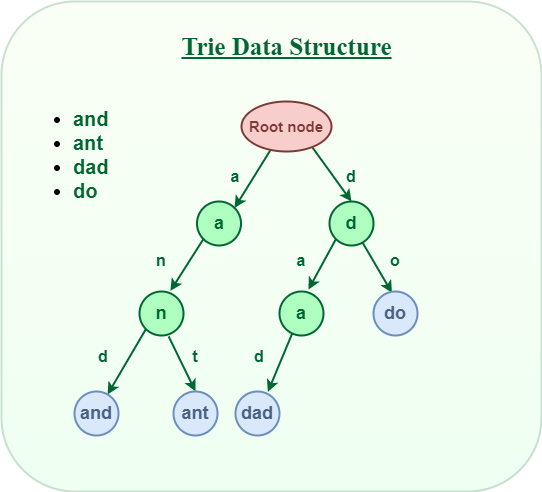

#**Lessons learned**

**1. Python usage: ''.joing(list)**

- To convert a list of characters like ['w', 'o'] into a single string 'wo', you can use the join method in Python. The join method concatenates all the elements of the list into a single string, using the specified separator. In this case, you would use an empty string as the separator. Example below.

```
char_list = ['w', 'o']
resulting_string = ''.join(char_list)
print(resulting_string)  # Output: 'wo'
```

**2. trie structure is useful for:**
- Storing a dynamic set of strings, where common prefixes are shared to save space.
- Efficiently searching for a string or prefix in a set of strings.
- Autocomplete systems, where the trie can suggest completions based on the input prefix.
- Implementing dictionaries or phone books, where quick lookup and prefix search are needed.


**3. Check edge-cases**
- Ensure to handle cases where the input list of strings is empty or contains empty strings.
- Consider cases where there is no common prefix among the input strings.
- Handle cases with a single string in the input list correctly.


**4. This problem could be solved using arrays, but it is worthwhile to practice trie structure.**

- While using arrays for finding the longest common prefix is straightforward, practicing with a trie structure offers insight into its utility and efficiency for certain types of problems.
- It provides experience in implementing and working with tree-based data structures, which can be beneficial for more complex problems and understanding advanced data structures.



